# Gather Data
## Import Python Packages

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd 
import numpy as np
import seaborn as sns
from re import sub
import json
import requests
import time
from bs4 import BeautifulSoup as bs

sns.set_style("darkgrid")

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm

In [3]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

## Gather list of Movies IDs

In [43]:
keys = get_keys("/Users/browz/.secret/tmdb_api.json")
api_key = keys['api_key']

Get list of movie IDs

Then get details

In [571]:
url = "https://api.themoviedb.org/3/discover/movie?api_key={}".format(api_key)

mov_ids = []
for page in tqdm(range(1, 501)):
    url_params = {'page': page,
                  'language': 'en-US',
                  'include_adult': False,
                  'include_video': False,
                  'vote_count_gte': '300'
    }

    resp = requests.get(url, url_params)
    
    assert(resp.status_code == 200)
    
    content = resp.json()
    mov_ids.extend([x['id'] for x in content['results']])

10000

In [150]:
mov_ids[np.random.randint(0,1000)]

726664

## Collect Movie Meta-Data

In [151]:
movs = []

for id in tqdm(mov_ids):
    url = "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US".format(id, api_key)
    resp = requests.get(url)
    content = resp.json()
    movs.append(content)

In [152]:
mov_df = pd.DataFrame(movs)

In [153]:
mov_df.shape

(10000, 28)

In [96]:
mov_df.to_csv('data/en_csv')

In [90]:
mov_df2 = pd.read_csv("data/five_year.csv")

# Cleaning Data

In [91]:
print(mov_df2.shape)
mov_df2['revenue'].value_counts()

(49978, 30)


0.0            47976
10000.0           20
1.0               12
1500000.0         12
10.0               8
               ...  
290061297.0        1
70821.0            1
1657449.0          1
40462793.0         1
310286.0           1
Name: revenue, Length: 1802, dtype: int64

In [92]:
mov_df2.drop(mov_df2[mov_df2['budget'] < 50001].index, inplace=True)
mov_df2.drop(mov_df2[mov_df2['revenue'] < 50001].index, inplace=True)
# mov_df2.drop(mov_df2[mov_df2['vote_average'] < .01].index, inplace=True)

mov_df2['genres'].dropna(inplace=True)
mov_df2['budget'].dropna(inplace=True)
mov_df2['revenue'].dropna(inplace=True)
mov_df2['vote_average'].dropna(inplace=True)

In [93]:
mov_df2['vote_average'].sort_values(ascending=True)

36248     0.0
19630     0.0
18368     0.0
17587     0.0
4869      0.0
         ... 
9183     10.0
36932    10.0
47911    10.0
17917    10.0
6442     10.0
Name: vote_average, Length: 991, dtype: float64

In [94]:
mov_df2.shape

(1022, 30)

In [509]:
mov_df2.keys()

Index(['Unnamed: 0', 'adult', 'backdrop_path', 'belongs_to_collection',
       'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'success', 'status_code',
       'status_message'],
      dtype='object')

In [510]:
mov_df2.head()

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,success,status_code,status_message
9,9,False,/2nFzxaAK7JIsk6l7qZ8rFBsa3yW.jpg,"{'id': 619537, 'name': 'Train to Busan Collect...",17000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",https://www.wellgousa.com/films/train-to-busan...,581392.0,tt8850222,ko,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}, {'iso...",Released,Escape The Apocalypse,Peninsula,False,7.0,732.0,NaN,NaN,NaN
10,10,False,/zzWGRw277MNoCs3zhyG3YmYQsXv.jpg,NaN,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://movies.disney.com/mulan-2020d,337401.0,tt4566758,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mulan,False,7.2,2809.0,NaN,NaN,NaN
13,13,False,/wu1uilmhM4TdluKi2ytfz8gidHf.jpg,"{'id': 275402, 'name': 'SpongeBob Collection',...",60000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",https://www.spongebobmovie.com/,400160.0,tt4823776,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're Not in Bikini Bottom Anymore.,The SpongeBob Movie: Sponge on the Run,False,8.3,1055.0,NaN,NaN,NaN
32,32,False,/zogWnCSztU8xvabaepQnAwsOtOt.jpg,NaN,30000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,531499.0,tt8461224,en,...,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Payback comes with interest.,The Tax Collector,False,6.0,171.0,NaN,NaN,NaN
37,37,False,/sizHX5VbwlBihaathTQHVGk1jdi.jpg,"{'id': 604246, 'name': 'Attraction Collection'...",8819200.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,514207.0,tt8060328,ru,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Invasion,False,7.0,415.0,NaN,NaN,NaN


In [511]:
cols = ['id', 'title', 'genres', 'popularity', 'release_date', 'budget', 'revenue', 'vote_average' ]
drop_cols = [x for x in mov_df2.columns if x not in cols]

In [512]:
mov_df = mov_df2.copy()
mov_df.drop(columns = drop_cols, inplace=True)
mov_df = mov_df.reindex(columns=cols)
mov_df

,id,title,genres,popularity,release_date,budget,revenue,vote_average
9,581392.0,Peninsula,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",800.753,2020-07-15,17000000.0,35878266.0,7.0
10,337401.0,Mulan,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",752.021,2020-09-04,200000000.0,57000000.0,7.2
13,400160.0,The SpongeBob Movie: Sponge on the Run,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",1114.882,2020-08-14,60000000.0,4700000.0,8.3
32,531499.0,The Tax Collector,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",492.096,2020-08-07,30000000.0,942666.0,6.0
37,514207.0,Invasion,"[{'id': 878, 'name': 'Science Fiction'}]",385.953,2020-01-01,8819200.0,32104054.0,7.0
...,...,...,...,...,...,...,...,...
9984,2370.0,Topaz,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",9.708,1969-12-17,4000000.0,6000000.0,6.1
9985,210947.0,Afflicted,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",11.963,2014-04-04,318000.0,121179.0,6.4
9990,360814.0,Dangal,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",11.718,2016-12-21,10400000.0,310000000.0,8.1
9993,219.0,Volver,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11.458,2006-03-16,12899867.0,85582407.0,7.5


In [513]:
mov_df.reset_index(inplace=True)
mov_df.drop(4354, inplace=True)


In [ ]:
mov_df['ROI'] = mov_df['revenue'] / mov_df['budget']

# Sort by Genres

In [515]:
eval_genres = eval(mov_df['genres'][0])
mov_df.reset_index(inplace=True)

In [516]:
lst = []
for i in range(mov_df.shape[0]):
    try:
        lst.append(eval(mov_df.loc[i, 'genres']))
    except:
        print(i)


## Reformatting genres to allow for data manipulation

In [517]:
mov_df['genres'] = [[x['name'] for x in eval_genres] for eval_genres in lst]

### Create a list of unique genres

In [519]:
genre_lst = []

In [565]:
mov_df['genres'].apply(lambda x: genre_lst.extend(x));

In [521]:
for genre in genre_lst:
    genre.strip(",[]'")
genre_set= set(genre_lst)

## Making a dictionary containing unique DataFrames for each genre

In [522]:
df_dict = {}
for genre in genre_set:
    df_dict[genre] = mov_df[mov_df['genres'].apply(lambda x: genre in x)].copy()
    df_dict[genre].drop(columns = ["level_0", "index"], axis=1, inplace=True)
    

In [523]:
df_dict['Music']

,id,title,genres,popularity,release_date,budget,revenue,vote_average,ROI
13,354912.0,Coco,"[Animation, Family, Comedy, Adventure, Fantasy...",256.108,2017-10-27,175000000.0,8.005260e+08,8.2,4.574434
21,420818.0,The Lion King,"[Adventure, Family, Music, Animation]",182.649,2019-07-12,260000000.0,1.656943e+09,7.2,6.372859
75,335797.0,Sing,"[Animation, Comedy, Drama, Family, Music]",96.344,2016-11-23,75000000.0,6.341517e+08,7.0,8.455356
152,424694.0,Bohemian Rhapsody,"[Drama, Music]",78.469,2018-10-24,52000000.0,8.940275e+08,8.0,17.192837
244,136799.0,Trolls,"[Adventure, Family, Comedy, Fantasy, Music, An...",54.171,2016-10-13,125000000.0,3.468645e+08,6.7,2.774916
...,...,...,...,...,...,...,...,...,...
4337,212769.0,Make Your Move,[Music],11.578,2013-08-07,15000000.0,1.583687e+06,6.0,0.105579
4339,21525.0,Tupac: Resurrection,"[Music, Documentary]",13.841,2003-11-14,300000.0,7.808524e+06,7.8,26.028413
4346,17917.0,Oliver!,"[Drama, Family, Music]",11.440,1968-09-26,10000000.0,3.740288e+07,7.0,3.740288
4378,22309.0,The Fighting Temptations,"[Comedy, Music, Romance]",13.620,2003-09-17,15000000.0,3.023858e+07,5.7,2.015905


In [525]:
print('All \n   Mean:    ', round(mov_df['ROI'].mean(), 3), 
      '\n   Median:  ', round(mov_df['ROI'].median(), 3),
     ' \n   Ratings: ', mov_df['vote_average'].median())

for genre in genre_set:
    print(genre, '\n   Mean:    ', round(df_dict[genre]['ROI'].mean(), 3), 
          '\n   Median:  ', round(df_dict[genre]['ROI'].median(), 3),
         ' \n   Ratings: ', df_dict[genre]['vote_average'].median())

All 
   Mean:     6.204 
   Median:   2.342  
   Ratings:  6.5
Western 
   Mean:     5.089 
   Median:   2.071  
   Ratings:  7.0
Action 
   Mean:     3.666 
   Median:   2.13  
   Ratings:  6.3
Science Fiction 
   Mean:     3.847 
   Median:   2.015  
   Ratings:  6.3
Family 
   Mean:     5.418 
   Median:   2.581  
   Ratings:  6.5
History 
   Mean:     2.925 
   Median:   1.595  
   Ratings:  7.0
Documentary 
   Mean:     30.843 
   Median:   6.87  
   Ratings:  7.0
Thriller 
   Mean:     4.788 
   Median:   2.108  
   Ratings:  6.3
Fantasy 
   Mean:     4.52 
   Median:   2.28  
   Ratings:  6.4
Music 
   Mean:     5.488 
   Median:   2.645  
   Ratings:  6.7
Animation 
   Mean:     7.313 
   Median:   2.806  
   Ratings:  6.8
TV Movie 
   Mean:     1.308 
   Median:   1.308  
   Ratings:  6.6
Mystery 
   Mean:     14.543 
   Median:   2.229  
   Ratings:  6.4
Comedy 
   Mean:     4.776 
   Median:   2.516  
   Ratings:  6.3
Drama 
   Mean:     5.152 
   Median:   2.169  
   Rating

In [557]:
median_roi = [mov_df['ROI'].median()]
mean_roi = [mov_df['ROI'].mean()]
med_rating = [mov_df['vote_average'].median()]

In [558]:
for genre in genre_set:
    mean_roi.append(round(df_dict[genre]['ROI'].mean(), 3))
    median_roi.append(round(df_dict[genre]['ROI'].median(), 3))
    med_rating.append(df_dict[genre]['vote_average'].median())

In [559]:
ind = ['All']
ind.extend(list(genre_set))
ser = {'median_roi': median_roi, 
                    'mean_roi':  mean_roi, 
                    'med_rating': med_rating}
len(median_roi)

20

In [560]:
desc_df = pd.DataFrame(data=ser, index=ind)

In [564]:
desc_df.sort_values(['median_roi'], ascending = False)

,median_roi,mean_roi,med_rating
Documentary,6.870000,30.843000,7.0
Animation,2.806000,7.313000,6.8
Horror,2.727000,16.379000,6.1
Music,2.645000,5.488000,6.7
Family,2.581000,5.418000,6.5
Romance,2.541000,5.310000,6.6
Comedy,2.516000,4.776000,6.3
Adventure,2.384000,4.305000,6.4
All,2.342392,6.203925,6.5
Fantasy,2.280000,4.520000,6.4


In [ ]:
']

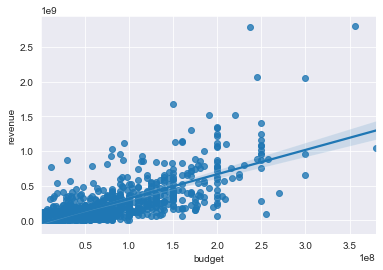

In [566]:
sns.regplot(x=df_dict['Action']['budget'], y=df_dict['Action']['revenue']);

In [6]:
df3 = pd.read_csv("data/discover.csv", engine='python')

In [33]:
df3.head(3)

,Unnamed: 0,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,0,306.289,7525.0,False,/tzYkC0vqX8Dokuwynhz1lnWWgWT.jpg,283366.0,False,/ld7V9BjMk2xtiBNcR8savyyk5ca.jpg,en,Miss Peregrine's Home for Peculiar Children,"[18, 14, 12, 10751]",Miss Peregrine's Home for Peculiar Children,6.7,A teenager finds himself transported to an isl...,2016-09-28
1,1,165.302,303.0,False,/4lwh4MX2yCogHflyAYMRbfdnpnm.jpg,420634.0,False,/fBNnj5bQ5YhzPUzxIW1UvLVZepP.jpg,en,Terrifier,"[53, 27]",Terrifier,6.3,A maniacal clown named Art terrorizes three yo...,2016-10-15
2,2,131.741,3734.0,False,/ubLbY97m8lYJ3Fykh7nfiwB5eth.jpg,316727.0,False,/craD86vySKvAkboyeXFnZwHrNA8.jpg,en,The Purge: Election Year,"[28, 27, 53]",The Purge: Election Year,6.4,Two years after choosing not to kill the man w...,2016-06-29


In [56]:
mov_ids = []
years = ['2018', '2019', '2020']
# df4 = df3[df3.release_date.str[:4]=='2017']

In [51]:
mov_ids = list(df4['id'])
# mov_ids.extend([x['id'] for x in content['results']])

In [57]:
for year in years:
    df4 = df3[df3.release_date.str[:4]==year]
    mov_ids = list(df4['id'])

    movs = []

    for id in tqdm(mov_ids):
        url = "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US".format(id, api_key)
        resp = requests.get(url)
        content = resp.json()
        movs.append(content)
    
    df = pd.DataFrame(movs)
    df.to_csv('data/{}.csv'.format(year))

In [53]:
year = '2017'
df = pd.DataFrame(movs)
df.to_csv('data/{}.csv'.format(year))

In [58]:
df_16 = pd.read_csv("data/2016.csv")
df_17 = pd.read_csv("data/2017.csv")
df_18 = pd.read_csv("data/2018.csv")
df_19 = pd.read_csv("data/2019.csv")
df_20 = pd.read_csv("data/2020.csv")

In [66]:
df_20['release_date'].head()

0    2020-10-23
1    2020-10-16
2    2020-10-26
3    2020-10-01
4    2020-10-23
Name: release_date, dtype: object

In [70]:
df = pd.read_csv("data/five_year.csv")

## Scrape IMDB for Box Office Info

In [4]:
page = requests.get("https://www.imdb.com/title/tt0848228/")
soup = bs(page.content, "html.parser")

In [20]:
# title_details = soup.find('div', id = "titleDetails")
# txt_blocks = title_details.find_all('div', class_="txt-block")

In [21]:
text_blocks = soup.select('div#titleDetails div.txt_block')

In [22]:
for id 
    url = "https://www.imdb.com/title/{}/".format(db_id)

    for itm in txt_blocks:
        try:
            if itm.find('h4', class_="inline").text == "Budget:": 
                budget_string = itm.text
                budget_lst = [char for char in budget_string if char.isnumeric()]
                budget = "".join(budget_lst)
            if itm.find('h4', class_="inline").text == "Cumulative Worldwide Gross:":
                rev_string = itm.text
                rev_lst = [char for char in rev_string if char.isnumeric()]
                revenue = "".join(rev_lst)

        except:
            None


In [23]:
budget

'220000000'

In [21]:
var = 8
try:
    if var == 6:
        print('6')
    if var == 5:
        print('5')
except:
    print('meltdown')